In [253]:
import math
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

In [277]:
#Reading the file in which the values are saved, converting the Date into a panda Datetime format
appa_hours = pd.read_csv("../../exports/appa1.csv")
appa_hours = appa_hours.drop('Unnamed: 0', axis=1)
appa_hours.Time = pd.to_datetime(appa_hours.Time)

In [278]:
appa_hours.columns

Index(['Unnamed: 0.1', 'Time', 'ZnOR_1', 'ZnOR_2', 'LaFeO3_1', 'LaFeO3_2',
       'WO3_1', 'WO3_2', 'ZnOR_1_heatR', 'ZnOR_2_heatR', 'LaFeO3_1_heatR',
       'LaFeO3_2_heatR', 'WO3_1_heatR', 'WO3_2_heatR', 'ZnOR_1_heatV',
       'ZnOR_2_heatV', 'LaFeO3_1_heatV', 'LaFeO3_2_heatV', 'WO3_1_heatV',
       'WO3_2_heatV', 'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
       'ZnOR_1_Age', 'ZnOR_2_Age', 'LaFeO3_1_Age', 'LaFeO3_2_Age', 'WO3_1_Age',
       'WO3_2_Age', 'sin_hour', 'cos_hour', 'sin_weekday', 'cos_weekday',
       'sin_month', 'cos_month', 'sin_ordate', 'cos_ordate', 'year', 'UV',
       'Rain', 'Wind_Speed', 'sin_wind', 'cos_wind', 'PM10', 'NO2', 'SO2',
       'O3', 'CO'],
      dtype='object')

<AxesSubplot:xlabel='Time'>

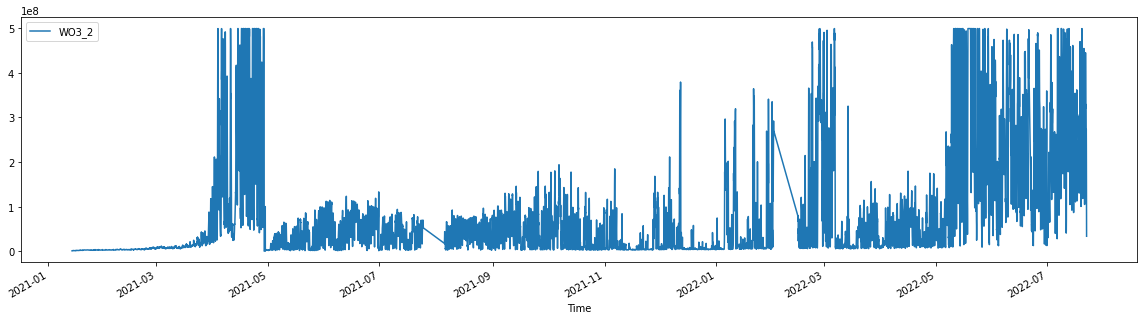

In [279]:
appa_hours.plot("Time", "WO3_2", figsize=(20,5))

<AxesSubplot:xlabel='Time'>

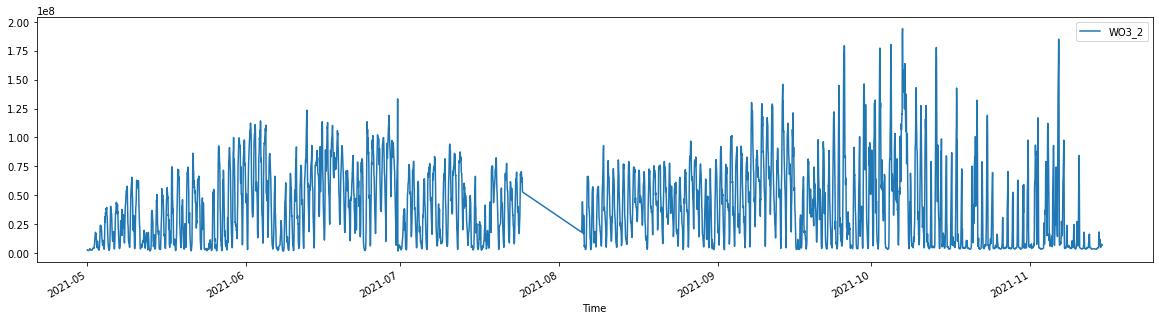

In [280]:
appa_hours = appa_hours[
    (appa_hours.Time > "2021-05-01")
    & (appa_hours.Time < "2021-11-15")
]

appa_hours.plot("Time", "WO3_2", figsize=(20,5))

In [281]:
#selecting all the values we need to train and test the model
appa_hours = appa_hours[[
    'ZnOR_1', 'ZnOR_2', 
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2', 
    'ZnOR_1_heatR', 'ZnOR_2_heatR', 
    'LaFeO3_1_heatR', 'LaFeO3_2_heatR', 
    'WO3_1_heatR', 'WO3_2_heatR', 
    'ZnOR_1_heatV', 'ZnOR_2_heatV', 
    'LaFeO3_1_heatV', 'LaFeO3_2_heatV', 
    'WO3_1_heatV','WO3_2_heatV', 
    'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
    'ZnOR_1_Age', 'ZnOR_2_Age', 
    'LaFeO3_1_Age', 'LaFeO3_2_Age', 
    'WO3_1_Age', 'WO3_2_Age', 
    'sin_month', 'cos_month', 
    'sin_ordate', 'cos_ordate',  
    'UV', 'Rain', 
    'Wind_Speed',
    'NO2', 'O3', 'CO'
]]

In [266]:
#selecting all the values we need to train and test the model
appa_hours = appa_hours[[
    'ZnOR_1', 'ZnOR_2', 
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2', 
    'NO2', 'O3', 'CO'
]]

# Random Forest

In [282]:
#Selecting the features
cols = [
    'ZnOR_1', 'ZnOR_2', 
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2', 
    'ZnOR_1_heatR', 'ZnOR_2_heatR', 
    'LaFeO3_1_heatR', 'LaFeO3_2_heatR', 
    'WO3_1_heatR', 'WO3_2_heatR', 
    'ZnOR_1_heatV', 'ZnOR_2_heatV', 
    'LaFeO3_1_heatV', 'LaFeO3_2_heatV', 
    'WO3_1_heatV','WO3_2_heatV', 
    'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
    'ZnOR_1_Age', 'ZnOR_2_Age', 
    'LaFeO3_1_Age', 'LaFeO3_2_Age', 
    'WO3_1_Age', 'WO3_2_Age', 
    'sin_month', 'cos_month', 
    'sin_ordate', 'cos_ordate',  
    'UV', 'Rain', 
    'Wind_Speed'
]

#Selecting the target
outs = ['NO2', 'O3', 'CO']

In [295]:
#Selecting the features
cols = [
    'ZnOR_1', 'ZnOR_2', 
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2', 
]



#Selecting the target
# outs = ['NO2', 'O3', 'CO']
outs = ['O3',]

In [296]:
#splitting the values in training and test
vsplit = round(len(appa_hours) * 0.2)

X_train = appa_hours.iloc[vsplit:][cols]
X_test = appa_hours.iloc[:vsplit][cols]

Y_train = appa_hours.iloc[vsplit:][outs]
Y_test = appa_hours.iloc[:vsplit][outs]


In [150]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start= 100, stop= 2000, num= 20)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200, num= 15)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 20, num= 19)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(2, 20, num= 19)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['sqrt'], 'max_depth': [10, 23, 37, 50, 64, 77, 91, 105, 118, 132, 145, 159, 172, 186, 200, None], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'bootstrap': [True, False]}


In [14]:
# Choosing the type of model
model = RandomForestRegressor()

In [32]:
# Performing the RandomForestRegression with a Random Search on hyper-parameters
rf_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=1000, cv=3, verbose=2,
                               random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=69, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=777; total time=  13.6s
[CV] END bootstrap=True, max_depth=69, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=777; total time=  13.9s
[CV] END bootstrap=True, max_depth=75, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=822; total time=  14.4s
[CV] END bootstrap=True, max_depth=66, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=822; total time=  14.5s
[CV] END bootstrap=True, max_depth=66, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=822; total time=  14.8s
[CV] END bootstrap=True, max_depth=75, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=822; total time=  14.8s
[CV] END bootstrap=True, max_depth=69, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=777; tota

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [65, 66, 67, 68, 69, 70,
                                                      71, 72, 73, 74, 75,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [2, 3],
                                        'min_samples_split': [9, 10, 11],
                                        'n_estimators': [600, 644, 688, 733,
                                                         777, 822, 866, 911,
                                                         955, 1000]},
                   random_state=42, verbose=2)

In [297]:
bla = rf_random.best_estimator_

In [298]:
bla.fit(X_train, Y_train)

/tmp/ipykernel_91554/247355885.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  bla.fit(X_train, Y_train)


RandomForestRegressor(max_depth=64, max_features='sqrt', min_samples_leaf=20,
                      min_samples_split=12)

In [299]:
bla.score(X_train, Y_train), bla.score(X_test, Y_test)

(0.9173337445585074, 0.8094978045492932)

In [300]:
bla.feature_importances_,

(array([0.06997667, 0.04086946, 0.16464171, 0.14971797, 0.29991944,
        0.27487474]),)

<AxesSubplot:xlabel='feature'>

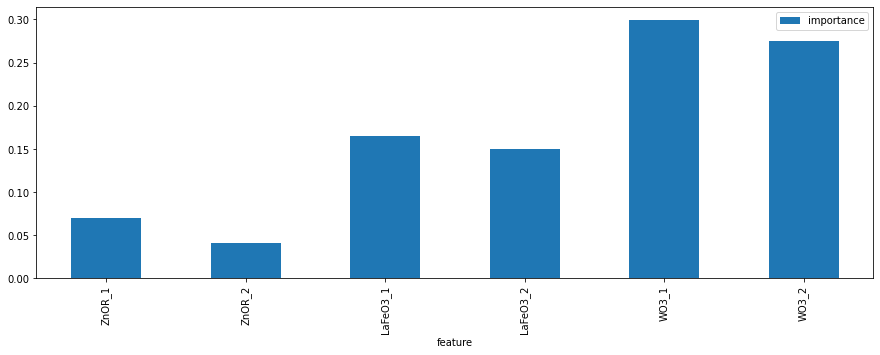

In [301]:
pd.DataFrame({"importance": bla.feature_importances_, "feature": X_train.columns}).plot.bar("feature", "importance", figsize=(15, 5))

In [302]:
appa_hours.corr()

,ZnOR_1,ZnOR_2,LaFeO3_1,LaFeO3_2,WO3_1,WO3_2,ZnOR_1_heatR,ZnOR_2_heatR,LaFeO3_1_heatR,LaFeO3_2_heatR,...,sin_month,cos_month,sin_ordate,cos_ordate,UV,Rain,Wind_Speed,NO2,O3,CO
ZnOR_1,1.000000,0.912718,-0.508061,-0.402984,0.568871,0.909105,0.046601,0.055703,-0.051647,-0.065097,...,0.116877,-0.081305,-0.027236,0.063120,0.188303,-0.035500,0.291215,-0.485642,0.673251,-0.358736
ZnOR_2,0.912718,1.000000,-0.492065,-0.388436,0.675293,0.825964,0.167148,0.033760,-0.224999,-0.204066,...,-0.108544,0.094828,-0.013156,0.019295,0.203763,-0.036606,0.310660,-0.445192,0.661739,-0.342237
LaFeO3_1,-0.508061,-0.492065,1.000000,0.943445,-0.392454,-0.391452,-0.154705,-0.066106,0.606101,0.628068,...,-0.126856,-0.084179,-0.043690,-0.018510,-0.052134,0.030057,-0.162707,0.305319,-0.444893,0.330984
LaFeO3_2,-0.402984,-0.388436,0.943445,1.000000,-0.280312,-0.285799,-0.287182,-0.215914,0.652741,0.686127,...,-0.095514,-0.019337,-0.063087,-0.023235,-0.030018,0.021769,-0.102752,0.217136,-0.311717,0.242004
WO3_1,0.568871,0.675293,-0.392454,-0.280312,1.000000,0.670012,-0.118049,-0.319672,-0.425347,-0.394773,...,-0.186260,0.259535,-0.017243,-0.068046,0.209443,-0.027875,0.399087,-0.407454,0.747233,-0.372911
WO3_2,0.909105,0.825964,-0.391452,-0.285799,0.670012,1.000000,-0.042987,-0.041089,-0.039293,-0.049431,...,0.127407,-0.016013,-0.035578,0.010562,0.188050,-0.026578,0.323499,-0.430521,0.736749,-0.308704
ZnOR_1_heatR,0.046601,0.167148,-0.154705,-0.287182,-0.118049,-0.042987,1.000000,0.902073,-0.009088,0.030974,...,-0.577949,-0.405206,0.039424,0.068287,-0.135079,-0.013424,-0.145329,0.305784,-0.377732,0.344332
ZnOR_2_heatR,0.055703,0.033760,-0.066106,-0.215914,-0.319672,-0.041089,0.902073,1.000000,0.281031,0.276823,...,-0.302748,-0.636902,0.029276,0.093916,-0.179887,-0.013897,-0.200191,0.341592,-0.482881,0.408774
LaFeO3_1_heatR,-0.051647,-0.224999,0.606101,0.652741,-0.425347,-0.039293,-0.009088,0.281031,1.000000,0.991442,...,0.145827,-0.527005,-0.057283,0.071833,-0.122397,-0.012868,-0.140173,0.225202,-0.364841,0.305875
LaFeO3_2_heatR,-0.065097,-0.204066,0.628068,0.686127,-0.394773,-0.049431,0.030974,0.276823,0.991442,1.000000,...,0.055773,-0.501832,-0.058230,0.070856,-0.117629,-0.014131,-0.137185,0.233419,-0.368394,0.309097


In [303]:
appa_hours.corr()

,ZnOR_1,ZnOR_2,LaFeO3_1,LaFeO3_2,WO3_1,WO3_2,ZnOR_1_heatR,ZnOR_2_heatR,LaFeO3_1_heatR,LaFeO3_2_heatR,...,sin_month,cos_month,sin_ordate,cos_ordate,UV,Rain,Wind_Speed,NO2,O3,CO
ZnOR_1,1.000000,0.912718,-0.508061,-0.402984,0.568871,0.909105,0.046601,0.055703,-0.051647,-0.065097,...,0.116877,-0.081305,-0.027236,0.063120,0.188303,-0.035500,0.291215,-0.485642,0.673251,-0.358736
ZnOR_2,0.912718,1.000000,-0.492065,-0.388436,0.675293,0.825964,0.167148,0.033760,-0.224999,-0.204066,...,-0.108544,0.094828,-0.013156,0.019295,0.203763,-0.036606,0.310660,-0.445192,0.661739,-0.342237
LaFeO3_1,-0.508061,-0.492065,1.000000,0.943445,-0.392454,-0.391452,-0.154705,-0.066106,0.606101,0.628068,...,-0.126856,-0.084179,-0.043690,-0.018510,-0.052134,0.030057,-0.162707,0.305319,-0.444893,0.330984
LaFeO3_2,-0.402984,-0.388436,0.943445,1.000000,-0.280312,-0.285799,-0.287182,-0.215914,0.652741,0.686127,...,-0.095514,-0.019337,-0.063087,-0.023235,-0.030018,0.021769,-0.102752,0.217136,-0.311717,0.242004
WO3_1,0.568871,0.675293,-0.392454,-0.280312,1.000000,0.670012,-0.118049,-0.319672,-0.425347,-0.394773,...,-0.186260,0.259535,-0.017243,-0.068046,0.209443,-0.027875,0.399087,-0.407454,0.747233,-0.372911
WO3_2,0.909105,0.825964,-0.391452,-0.285799,0.670012,1.000000,-0.042987,-0.041089,-0.039293,-0.049431,...,0.127407,-0.016013,-0.035578,0.010562,0.188050,-0.026578,0.323499,-0.430521,0.736749,-0.308704
ZnOR_1_heatR,0.046601,0.167148,-0.154705,-0.287182,-0.118049,-0.042987,1.000000,0.902073,-0.009088,0.030974,...,-0.577949,-0.405206,0.039424,0.068287,-0.135079,-0.013424,-0.145329,0.305784,-0.377732,0.344332
ZnOR_2_heatR,0.055703,0.033760,-0.066106,-0.215914,-0.319672,-0.041089,0.902073,1.000000,0.281031,0.276823,...,-0.302748,-0.636902,0.029276,0.093916,-0.179887,-0.013897,-0.200191,0.341592,-0.482881,0.408774
LaFeO3_1_heatR,-0.051647,-0.224999,0.606101,0.652741,-0.425347,-0.039293,-0.009088,0.281031,1.000000,0.991442,...,0.145827,-0.527005,-0.057283,0.071833,-0.122397,-0.012868,-0.140173,0.225202,-0.364841,0.305875
LaFeO3_2_heatR,-0.065097,-0.204066,0.628068,0.686127,-0.394773,-0.049431,0.030974,0.276823,0.991442,1.000000,...,0.055773,-0.501832,-0.058230,0.070856,-0.117629,-0.014131,-0.137185,0.233419,-0.368394,0.309097


<AxesSubplot:xlabel='WO3_1', ylabel='WO3_2'>

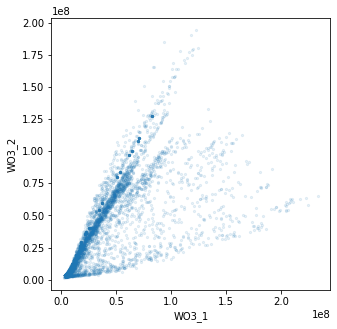

In [304]:
appa_hours[["WO3_1", "WO3_2"]].plot.scatter(
    "WO3_1", "WO3_2", marker=".", figsize=(5, 5), alpha=0.1
)

<AxesSubplot:xlabel='WO3_1', ylabel='WO3_2'>

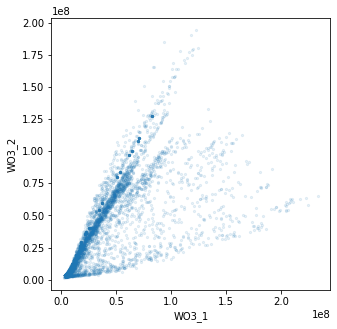

In [305]:
appa_hours[["WO3_1", "WO3_2"]].plot.scatter(
    "WO3_1", "WO3_2", marker=".", figsize=(5, 5), alpha=0.1
)

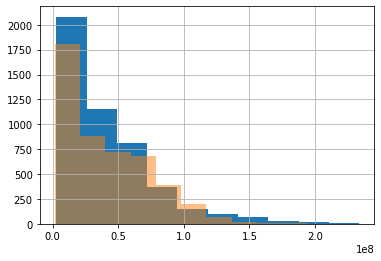

In [306]:
ax = appa_hours.WO3_1.hist()
ax = appa_hours.WO3_2.hist(alpha=0.5, ax=ax)

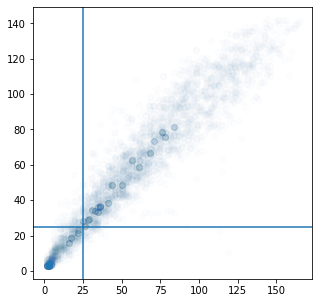

In [307]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(Y_train.O3, bla.predict(X_train), alpha=.01)
ax.axhline(25)
ax.axvline(25)


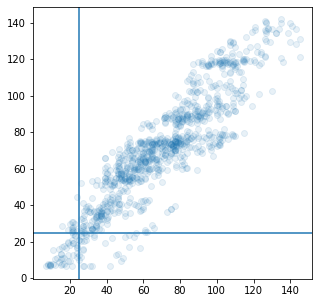

In [308]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(Y_test.O3, bla.predict(X_test), alpha=.1)
ax.axhline(25)
ax.axvline(25)


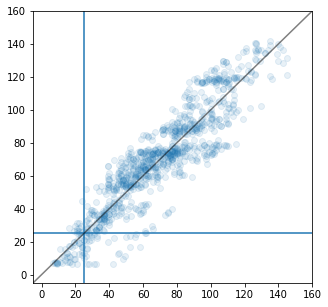

In [310]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(Y_test.O3, bla.predict(X_test), alpha=.1)
ax.axhline(25)
ax.axvline(25)
ax.set_xlim(-5, 160)
ax.set_ylim(-5, 160)
ax.plot([-100, 1000], [-100, 1000], c="k", alpha=0.5)


In [270]:
bad_pred_train_index = Y_train[(Y_train.O3 < 25) & (bla.predict(X_train) < 25)].index
X_train.loc[bad_pred_train_index]

,ZnOR_1,ZnOR_2,LaFeO3_1,LaFeO3_2,WO3_1,WO3_2
4170,6.582378e+07,6.582378e+07,4.044129e+06,5.004456e+06,5.327411e+06,2.627584e+06
4171,7.123621e+07,7.123621e+07,4.560992e+06,5.461212e+06,5.394428e+06,2.812893e+06
4172,6.856719e+07,6.856719e+07,4.892666e+06,5.697581e+06,4.797690e+06,2.639980e+06
4173,5.229419e+07,5.229419e+07,5.529943e+06,6.228372e+06,3.684051e+06,2.205475e+06
4174,6.306806e+07,6.306806e+07,5.802315e+06,6.364759e+06,4.598275e+06,2.667299e+06
...,...,...,...,...,...,...
7675,1.981492e+07,3.737040e+07,1.341630e+07,1.280000e+07,5.750092e+06,5.674950e+06
7676,3.353598e+07,5.587252e+07,1.294222e+07,1.219879e+07,6.381692e+06,6.338555e+06
7677,4.169070e+07,6.662586e+07,1.251804e+07,1.171717e+07,6.260228e+06,6.251572e+06
7678,6.343043e+07,8.615475e+07,1.214061e+07,1.163636e+07,7.364535e+06,7.717147e+06


In [271]:
bad_pred_index = Y_test[(Y_test.O3 < 25) & (bla.predict(X_test) < 25)].index
X_test.loc[bad_pred_index]

,ZnOR_1,ZnOR_2,LaFeO3_1,LaFeO3_2,WO3_1,WO3_2
2893,8.011100e+06,8.011100e+06,1.081248e+07,5.123129e+06,3.738302e+06,2.118568e+06
2894,7.612667e+06,7.612667e+06,1.091258e+07,5.164575e+06,3.828496e+06,2.114562e+06
3174,3.608433e+07,3.608433e+07,6.823199e+06,5.434555e+06,7.616829e+06,2.166596e+06
3175,1.988703e+07,1.988703e+07,8.044539e+06,5.872916e+06,4.807560e+06,1.840644e+06
3176,1.735438e+07,1.735438e+07,8.643204e+06,6.057727e+06,4.442697e+06,1.759034e+06
3177,2.000591e+07,2.000591e+07,8.720179e+06,6.098980e+06,6.170990e+06,2.073396e+06
3295,3.991515e+07,3.991515e+07,4.149792e+06,3.879969e+06,7.082912e+06,2.266657e+06
3296,3.035171e+07,3.035171e+07,5.332164e+06,4.560286e+06,5.256781e+06,2.101183e+06
3367,4.577753e+07,4.577753e+07,3.616887e+06,3.638163e+06,6.552896e+06,2.095422e+06
3368,3.195702e+07,3.195702e+07,4.947807e+06,4.523411e+06,4.413868e+06,1.892213e+06


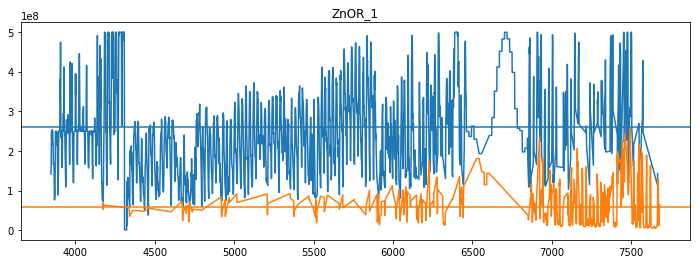

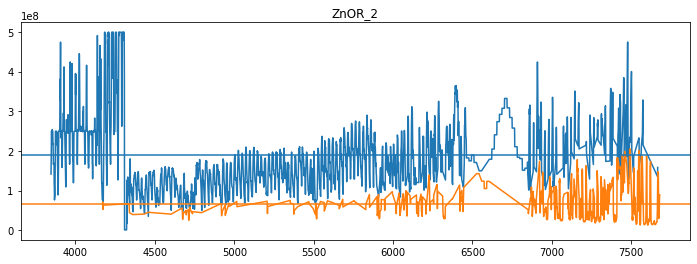

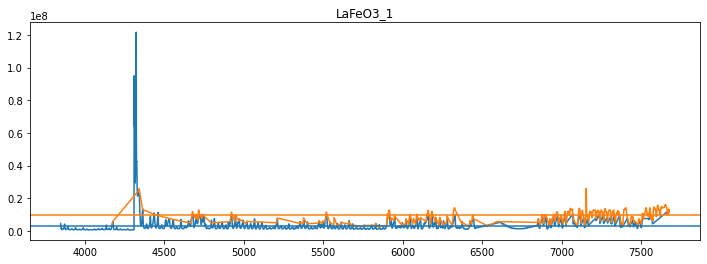

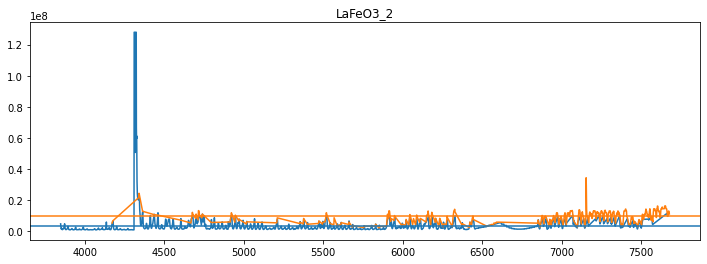

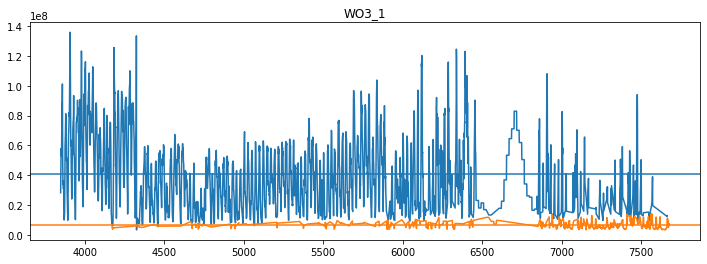

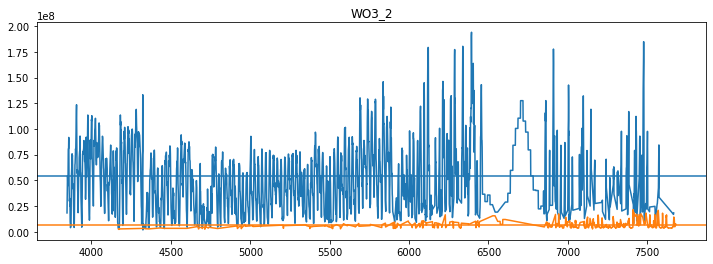

In [272]:
for col in cols:
    fig, ax = plt.subplots(figsize=(12, 4))
    X_train.loc[~X_train.index.isin(bad_pred_train_index), col].plot(title=col, ax=ax)
    X_train.loc[bad_pred_train_index, col].plot(ax=ax)

    ax.axhline(X_train.loc[~X_train.index.isin(bad_pred_train_index), col].mean())
    ax.axhline(X_train.loc[bad_pred_train_index, col].mean(), c="C1")


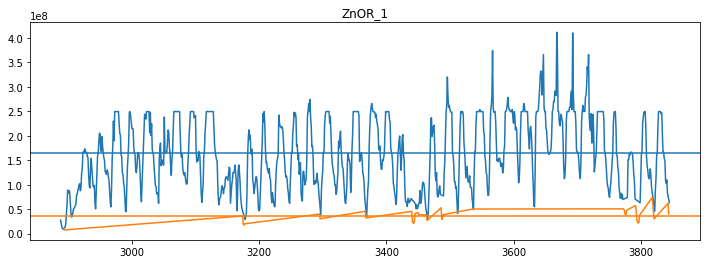

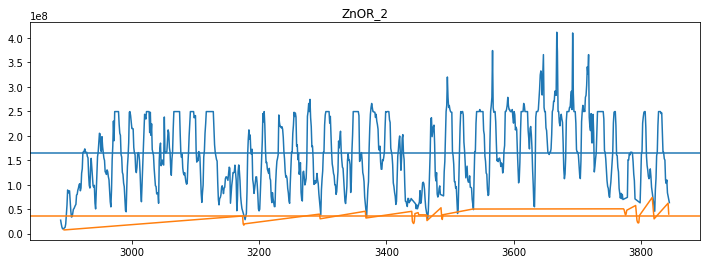

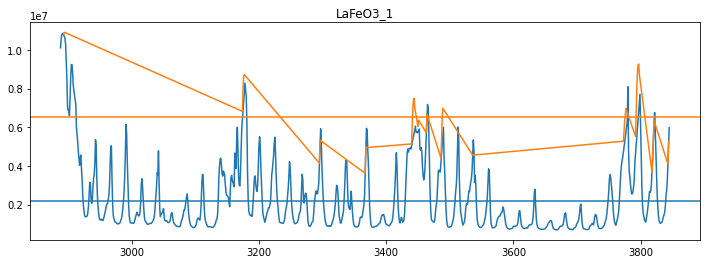

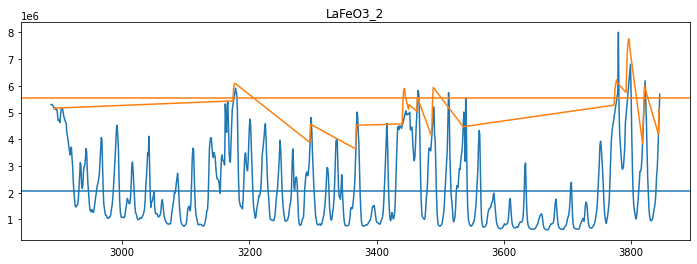

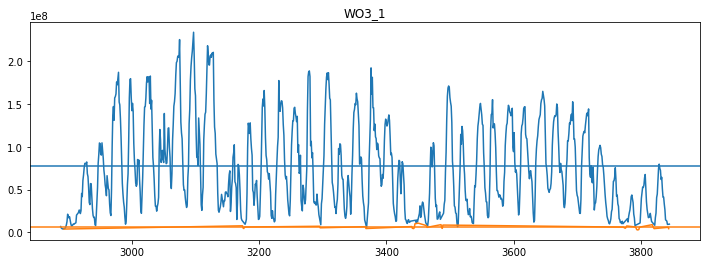

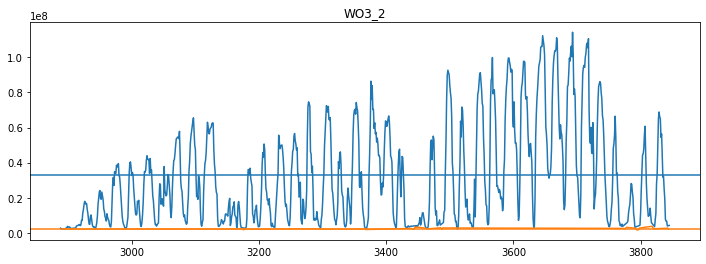

In [273]:
for col in cols:
    fig, ax = plt.subplots(figsize=(12, 4))
    X_test.loc[~X_test.index.isin(bad_pred_index), col].plot(title=col, ax=ax)
    X_test.loc[bad_pred_index, col].plot(ax=ax)

    ax.axhline(X_test.loc[~X_test.index.isin(bad_pred_index), col].mean())
    ax.axhline(X_test.loc[bad_pred_index, col].mean(), c="C1")


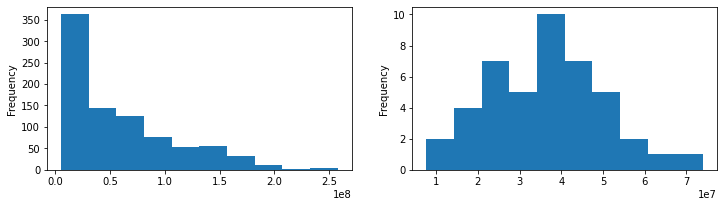

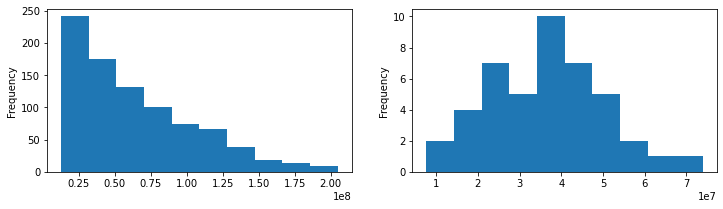

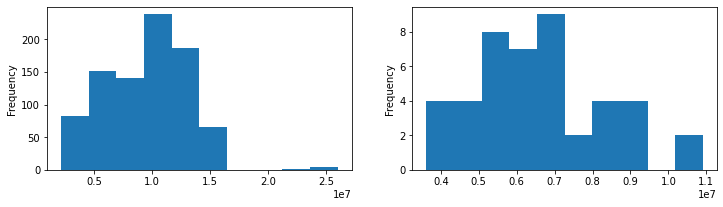

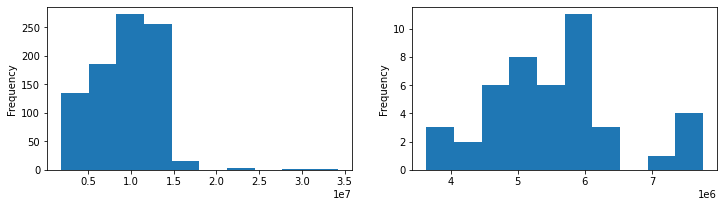

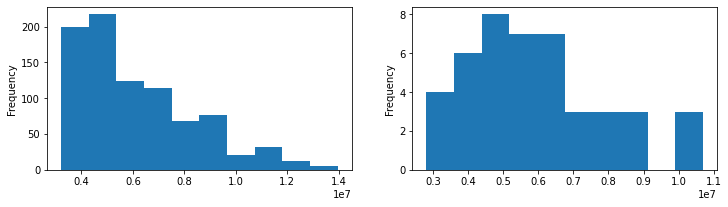

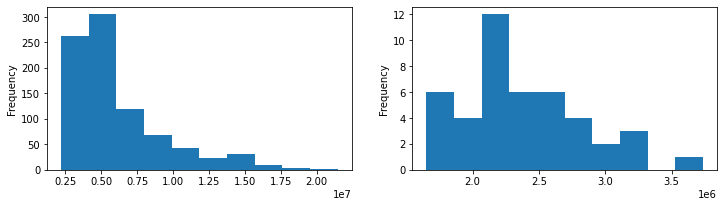

In [274]:
for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    X_train.loc[bad_pred_train_index, col].plot.hist(ax=axes[0])
    X_test.loc[bad_pred_index, col].plot.hist(ax=axes[1])

In [275]:
X_train.describe()

,ZnOR_1,ZnOR_2,LaFeO3_1,LaFeO3_2,WO3_1,WO3_2
count,3.834000e+03,3.834000e+03,3.834000e+03,3.834000e+03,3.834000e+03,3.834000e+03
mean,2.145587e+08,1.612259e+08,4.551177e+06,4.554843e+06,3.284372e+07,4.310744e+07
std,1.295890e+08,9.518078e+07,5.810807e+06,8.093641e+06,2.529066e+07,3.468928e+07
min,7.185834e+05,6.544534e+05,6.444561e+05,5.755962e+05,3.203843e+06,1.711056e+06
25%,1.160266e+08,9.447309e+07,1.526786e+06,1.270050e+06,1.102840e+07,1.092308e+07
50%,2.150016e+08,1.496819e+08,2.691750e+06,2.340856e+06,2.685368e+07,3.685289e+07
75%,2.903729e+08,2.120750e+08,5.704348e+06,5.632500e+06,4.986993e+07,6.728764e+07
max,4.990000e+08,4.990000e+08,1.216000e+08,1.280000e+08,1.359806e+08,1.941083e+08


In [276]:
appa_hours

,ZnOR_1,ZnOR_2,LaFeO3_1,LaFeO3_2,WO3_1,WO3_2,NO2,O3,CO
2888,2.748574e+07,2.748574e+07,1.010758e+07,5.295414e+06,6.742857e+06,2.655831e+06,12.0,49.0,0.696000
2889,1.974194e+07,1.974194e+07,1.058386e+07,5.306430e+06,5.065446e+06,2.342123e+06,13.0,42.0,0.700000
2890,1.345830e+07,1.345830e+07,1.077354e+07,5.291025e+06,4.393868e+06,2.250969e+06,13.0,32.0,0.694000
2891,9.973675e+06,9.973675e+06,1.084921e+07,5.249248e+06,3.975306e+06,2.144965e+06,11.0,28.0,0.691333
2892,9.504600e+06,9.504600e+06,1.085845e+07,5.196105e+06,4.005057e+06,2.168709e+06,13.0,27.0,0.696000
...,...,...,...,...,...,...,...,...,...
7675,1.981492e+07,3.737040e+07,1.341630e+07,1.280000e+07,5.750092e+06,5.674950e+06,37.0,3.0,0.810000
7676,3.353598e+07,5.587252e+07,1.294222e+07,1.219879e+07,6.381692e+06,6.338555e+06,33.0,5.0,0.759333
7677,4.169070e+07,6.662586e+07,1.251804e+07,1.171717e+07,6.260228e+06,6.251572e+06,31.0,6.0,0.762000
7678,6.343043e+07,8.615475e+07,1.214061e+07,1.163636e+07,7.364535e+06,7.717147e+06,28.0,6.0,0.780667


In [33]:
#Creating a Dataframe with the results of the model and then saving them into a .csv file
ris = pd.DataFrame(rf_random.cv_results_)
ris.to_csv('results_weather1_ultimate(2).csv')

In [ ]:
# Save the model itself in a .sav file
pickle.dump(rf_random, open('model_weather2_ultimate(2).sav', 'wb'))

## Results

In [18]:
rf_random = pickle.load(open("models/model_weather2_ultimate(2).sav", "rb"))
rf_random

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 23, 37, 50, 64, 77,
                                                      91, 105, 118, 132, 145,
                                                      159, 172, 186, 200,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14, 15, 16, 17,
                                                             18, 19, 20],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=42, verbose=2)

In [20]:
print("NO2: " + str(mean_absolute_error(Y_test.NO2 , rf_random.predict(X_test)[: ,0])))
print("O3: " + str(mean_absolute_error(Y_test.O3 , rf_random.predict(X_test)[: ,1])))
print("CO: " + str(mean_absolute_error(Y_test.CO , rf_random.predict(X_test)[: ,2])))
print("Total: " + str(mean_absolute_error(Y_test, rf_random.predict(X_test))))

NO2: 15.698173375865514
O3: 21.97022537888581
CO: 0.13215943482197756
Total: 12.600186063191101


In [32]:
Y_test.CO.describe()

count    2725.000000
mean        0.840273
std         0.185345
min         0.542000
25%         0.711333
50%         0.769333
75%         0.930000
max         1.892000
Name: CO, dtype: float64

## Hyper Parameters Plots

In [21]:
ris = pd.read_csv("results/results_weather1_ultimate(2).csv")
ris.columns

Index(['Unnamed: 0', 'mean_fit_time', 'std_fit_time', 'mean_score_time',
       'std_score_time', 'param_n_estimators', 'param_min_samples_split',
       'param_min_samples_leaf', 'param_max_features', 'param_max_depth',
       'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

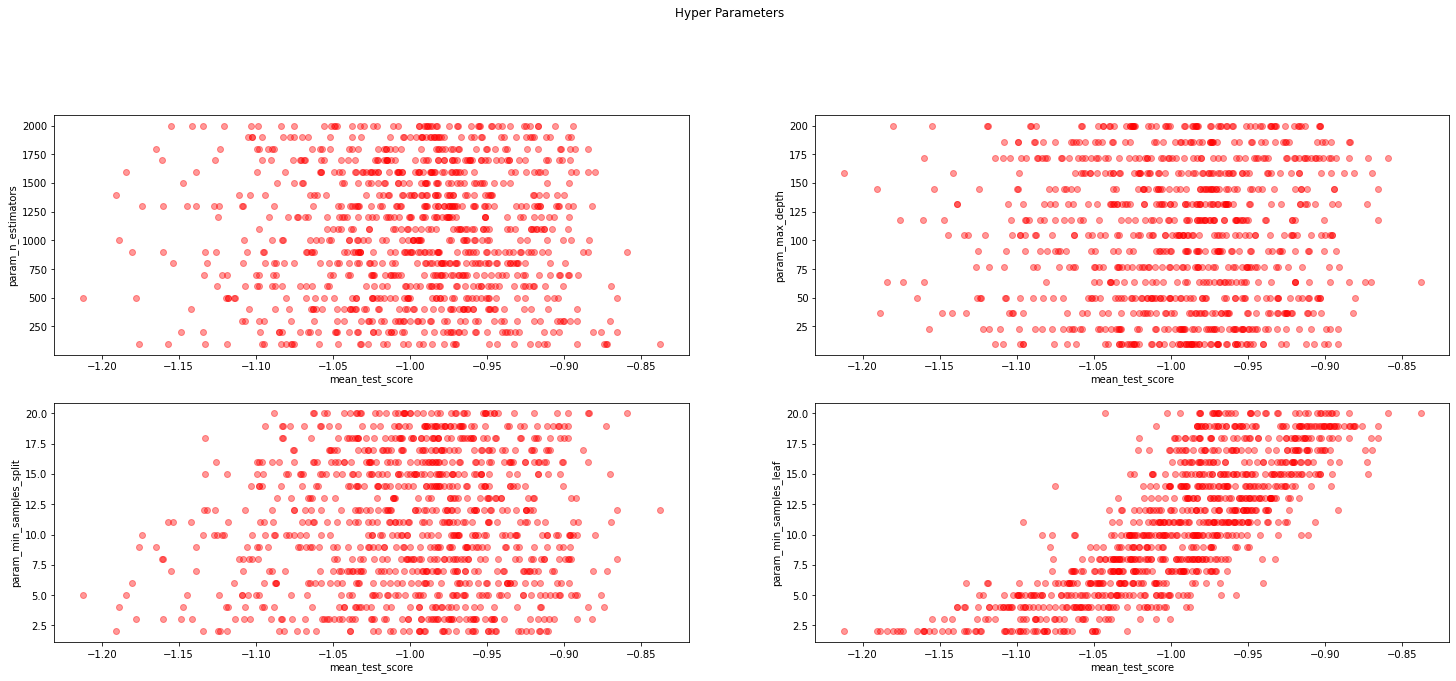

In [22]:
#Plotting the hyper-parameters in relation of mean test score
#Values are plotted through dots. The brighter the dot, the more times that value has been chosen by the models.
#On the X scale, the closer the values are to 0 the better they are

h_params = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', ]
fig = plt.figure(figsize=(25, 15))
fig.suptitle('Hyper Parameters')
outer = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.2)
for index, h_param in enumerate(h_params):
    ax = plt.Subplot(fig, outer[index])
    ax.scatter(ris['mean_test_score'], ris[h_param], color='red', alpha=0.4, )
    ax.set_ylabel(h_param)
    ax.set_xlabel('mean_test_score')
    fig.add_subplot(ax)
fig.show()

## Feature Importance

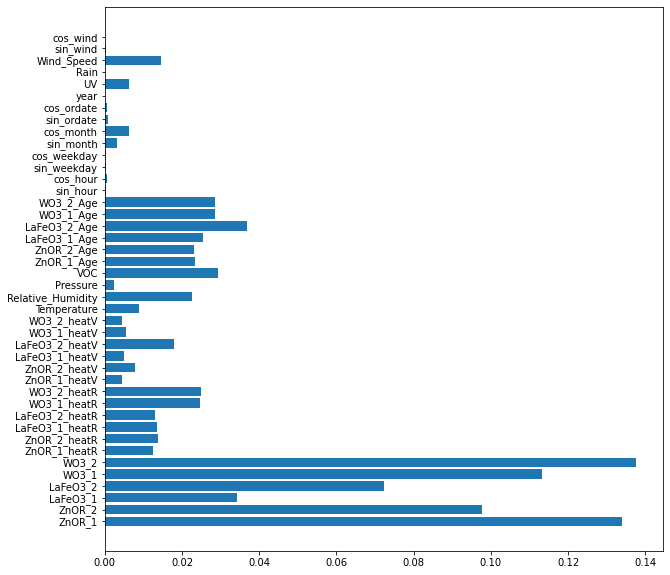

In [24]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.barh(X_test.columns, rf_random.best_estimator_.feature_importances_)
plt.show()

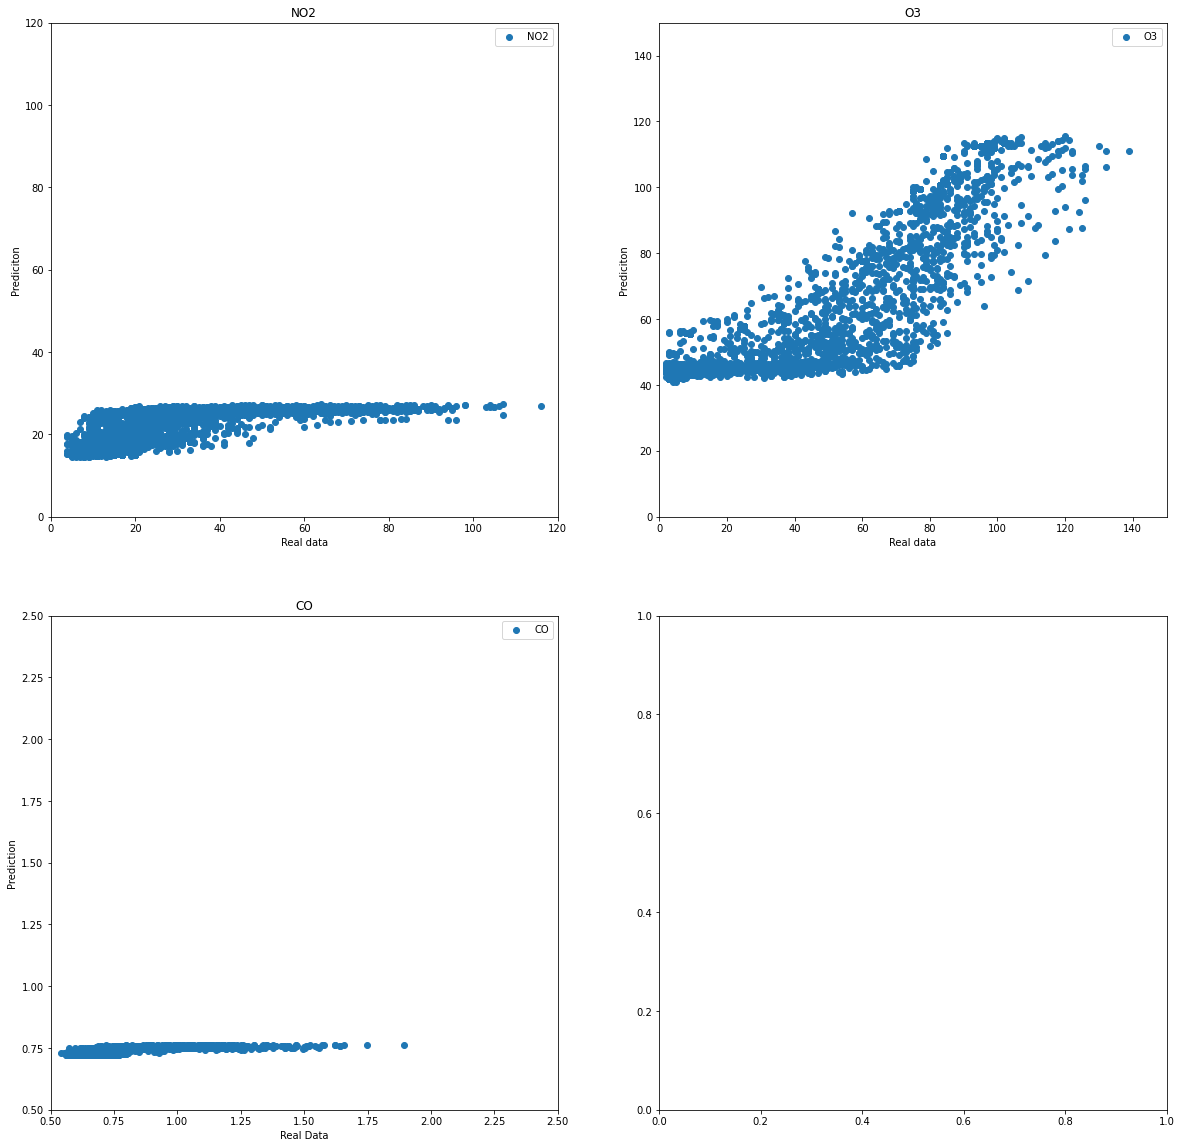

In [30]:
#Printing the charts to undersand better our predictions

fig,((ax1,ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

ax1.scatter(Y_test.NO2, rf_random.predict(X_test)[:, 0], label = "NO2")
ax2.scatter(Y_test.O3, rf_random.predict(X_test)[:, 1], label = "O3")
ax3.scatter(Y_test.CO, rf_random.predict(X_test)[:, 2], label = "CO")

ax1.set_xlim(0, 120)
ax1.set_ylim(0, 120)
ax2.set_xlim(0, 150)
ax2.set_ylim(0, 150)
ax3.set_xlim(0.5, 2.5)
ax3.set_ylim(0.5, 2.5)

ax1.set_title('NO2')
ax1.set_xlabel('Real data')
ax1.set_ylabel('Prediciton')
ax2.set_title('O3')
ax2.set_xlabel('Real data')
ax2.set_ylabel('Prediciton')
ax3.set_title('CO')
ax3.set_xlabel('Real Data')
ax3.set_ylabel('Prediction')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()